In [1]:
from mnist import MNIST
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mndata = MNIST('../samples')

imagesTrain, labelsTrain = mndata.load_training()
imagesTest, labelsTest = mndata.load_testing()

In [51]:
print(mndata.display(imagesTrain[0]),labelsTrain[0])


............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................ 5


In [3]:
#convert all the minst representation into 1 and 0
def imageToBinary(imageList):
    imageBinary = []
    for image in imageList:
        image = np.array(image)>0
        image = image * 1
        image = list(image)
        imageBinary.append(image)
        
    return imageBinary


In [4]:
imagesTrainBinary = imageToBinary(imagesTrain)
imagesTestBinary = imageToBinary(imagesTest)

In [5]:
imageTrainDf = pd.DataFrame(imagesTrainBinary)
trainLabelDf = pd.DataFrame(list(labelsTrain))

In [6]:
trainLabelDf.columns = ["label"]

In [7]:
trainLabelDf.label = trainLabelDf.label.astype(str)

In [8]:
trainDf = pd.concat([imageTrainDf,trainLabelDf],axis=1)

In [9]:
trainDf.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [10]:
unique_class =trainDf['label'].unique()
for class_tag in unique_class:
    count = sum(trainDf['label'] == class_tag)
    print("fraction of %s : %f"%(class_tag, count/len(trainDf['label'])))

fraction of 5 : 0.090350
fraction of 0 : 0.098717
fraction of 4 : 0.097367
fraction of 1 : 0.112367
fraction of 9 : 0.099150
fraction of 2 : 0.099300
fraction of 3 : 0.102183
fraction of 6 : 0.098633
fraction of 7 : 0.104417
fraction of 8 : 0.097517


In [11]:
from sklearn.model_selection import train_test_split
X = trainDf[trainDf.columns[:-1]].values
y = trainDf[trainDf.columns[-1]].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state =  42 )

In [21]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
logistic = linear_model.LogisticRegression(solver = 'sag', max_iter = 1000, \
                                           multi_class = 'multinomial',C = 1e5, warm_start = True, penalty='l2',tol=0.01)

In [22]:
logistic.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='sag', tol=0.01, verbose=0,
          warm_start=True)

In [27]:
print("The score in train set: %f"%logistic.score(X_train,y_train))
print("The score in the valid set: %f"%(logistic.score(X_valid, y_valid)))

The score in train set: 0.936771
The score in the valid set: 0.911250


In [47]:
y_predicted_valid = logistic.predict(X_valid)
print(confusion_matrix(y_valid,y_predicted_valid))
#plt.matshow(confusion_matrix(y_valid,y_predicted_valid))

[[1120    0    6    4    7   11    9    1   15    2]
 [   0 1279   11    6    2    6    4    0   13    1]
 [   3   14 1056   17   12    5   15   14   28   10]
 [   6    8   36 1071    1   36    2   12   29   18]
 [   3    4   10    4 1081    4   11    5   12   42]
 [  24    6   11   44   12  950   13    6   32    6]
 [   9    2   21    4   10   19 1106    0    6    0]
 [   2    4   14   13   10    1    0 1204    7   44]
 [  10   22   24   30    8   36   12    2 1003   13]
 [   6    6    6   15   38    5    0   44    9 1065]]


In [44]:
# Let us test the test set
X_test = np.asarray(imagesTestBinary)
y_test_array = np.array(labelsTest)
y_test = y_test_array.astype(str)

In [95]:
predicted_test = logistic.predict(X_test)
print("The score in test set: %f"%logistic.score(X_test,y_test))

The score in test set: 0.914300


In [72]:
#Let us try using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform')


In [73]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [74]:
print("The score in train set: %f"%neigh.score(X_train,y_train))
print("The score in the valid set: %f"%(neigh.score(X_valid, y_valid)))

The score in train set: 0.969479
The score in the valid set: 0.964000


In [75]:
print("The score in train set: %f"%neigh.score(X_test,y_test))


The score in train set: 0.960600


In [76]:
# SVM for classification
from sklearn import svm
svm_clf = svm.SVC(gamma = 'scale', C = 1000)

In [77]:
svm_clf.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
y_predicted_valid = svm_clf.predict(X_valid)

In [80]:
print("The score in test set: %f"%svm_clf.score(X_test,y_test))
print("The score in the train set: %f"%(svm_clf.score(X_valid, y_valid)))

The score in test set: 0.973800
The score in the train set: 0.973250


In [32]:
#ANN training 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn import metrics


In [18]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

sc = StandardScaler()
lb = LabelEncoder()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_valid = lb.fit_transform(y_valid)


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)

X_train.shape

(48000, 784)

In [19]:
y_valid

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [33]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', input_dim = 784))


# Adding the second hidden layer
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.1))

# Adding the output layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 20,validation_data = (X_valid, y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 31s 642us/step - loss: 0.4882 - acc: 0.8575 - val_loss: 0.2225 - val_acc: 0.9402
Epoch 2/20
48000/48000 [==============================] - 18s 383us/step - loss: 0.2553 - acc: 0.9344 - val_loss: 0.1719 - val_acc: 0.9557
Epoch 3/20
48000/48000 [==============================] - 19s 403us/step - loss: 0.2021 - acc: 0.9486 - val_loss: 0.1744 - val_acc: 0.9564
Epoch 4/20
48000/48000 [==============================] - 19s 386us/step - loss: 0.1774 - acc: 0.9542 - val_loss: 0.1687 - val_acc: 0.9608
Epoch 5/20
48000/48000 [==============================] - 18s 384us/step - loss: 0.1584 - acc: 0.9599 - val_loss: 0.1739 - val_acc: 0.9620
Epoch 6/20
48000/48000 [==============================] - 19s 388us/step - loss: 0.1485 - acc: 0.9634 - val_loss: 0.1633 - val_acc: 0.9651
Epoch 7/20
48000/48000 [==============================] - 19s 393us/step - loss: 0.1333 - acc: 0.9665 - val_loss: 0.

In [34]:
#testing the model
y_test_prediction = classifier.predict(X_test)

In [35]:
y_prediction = [np.argmax(test_y, axis=None, out=None) for test_y in y_test_prediction]

In [36]:
y_prediction_label = lb.inverse_transform(y_prediction)

In [47]:
y_predict = y_prediction_label.astype(str)

In [50]:
print("The accuracy of the test data is ",metrics.accuracy_score(y_test,y_predict))

The accuracy of the test data is  0.9675


In [86]:
#use of CNN to train MNIST data
image=np.array(imagesTrain[0])
mn = image.size
m = int(np.sqrt(mn))
imageReshaped = np.reshape(image,(m,m))

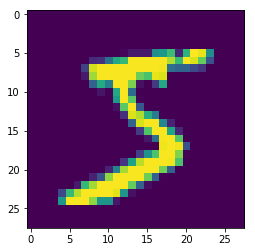

In [85]:
plt.imshow(imageReshaped)

In [143]:
imagesTrainReshaped = []
for images in imagesTrain:
    train = np.reshape(images,(m,m)).astype("float32")/255.0
    imagesTrainReshaped.append(train[:,:,np.newaxis])
    
imagesTrainReshaped = np.array(imagesTrainReshaped)

In [151]:
imagesTestReshaped = []
for images in imagesTest:
    test = np.reshape(images,(m,m)).astype("float32")/255.0
    imagesTestReshaped.append(test[:,:,np.newaxis])
imagesTestReshaped = np.array(imagesTestReshaped)

In [147]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,LabelEncoder
from keras.layers import Conv2D, MaxPooling2D

In [148]:
X_train, X_valid, y_train, y_valid = train_test_split(imagesTrainReshaped, labelsTrain, test_size = 0.2, random_state =  42 )
X_test = imagesTestReshaped
y_test = labelsTest

In [149]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_valid = lb.fit_transform(y_valid)


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)

In [150]:
#for CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(),metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs = 10, verbose = 1, validation_data=(X_valid,y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 418s 9ms/step - loss: 0.2916 - acc: 0.9102 - val_loss: 0.0774 - val_acc: 0.9767
Epoch 2/10
48000/48000 [==============================] - 141s 3ms/step - loss: 0.1014 - acc: 0.9711 - val_loss: 0.0548 - val_acc: 0.9827
Epoch 3/10
48000/48000 [==============================] - 140s 3ms/step - loss: 0.0724 - acc: 0.9782 - val_loss: 0.0539 - val_acc: 0.9860
Epoch 4/10
48000/48000 [==============================] - 142s 3ms/step - loss: 0.0593 - acc: 0.9819 - val_loss: 0.0442 - val_acc: 0.9873
Epoch 5/10
48000/48000 [==============================] - 138s 3ms/step - loss: 0.0464 - acc: 0.9861 - val_loss: 0.0524 - val_acc: 0.9863
Epoch 6/10
48000/48000 [==============================] - 137s 3ms/step - loss: 0.0390 - acc: 0.9876 - val_loss: 0.0411 - val_acc: 0.9891
Epoch 7/10
48000/48000 [==============================] - 139s 3ms/step - loss: 0.0326 - acc: 0.9893 - val_loss: 0.0439 - 

In [156]:
y_predict = model.predict(imagesTestReshaped)

In [171]:
y_prediction = [np.argmax(test_y, axis=None, out=None) for test_y in y_predict]
y_test_label = [np.argmax(test_y, axis=None, out=None) for test_y in y_test]

In [172]:
y_prediction = lb.inverse_transform(y_prediction)
y_test = lb.inverse_transform(y_test_label)

In [174]:
print("accuracy is ", metrics.accuracy_score(y_prediction,y_test))

accuracy is  0.991


In [170]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)